In [2]:
import numpy as np
import time

from reservoir import Reservoir
import data_utils

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
memory_delay = 7
input_data, y = data_utils.memory(sequence_length=1000, memory_delay=memory_delay)
b = Reservoir(n_res=1000, res_encoding=None, 
              input_scale=1, input_encoding=None, 
              random_projection='simulation', weights_type='gaussian', 
              activation_fun='tanh', 
              train_method='ridge', train_param=1e1
              )

In [49]:
b.fit(input_data, y);

Start of training...
Initialization finished. Elapsed time: 0.03393054008483887s
100%|██████████| 1000/1000 [00:00<00:00, 9395.00it/s]
Iterations finished. Elapsed time: 0.10840749740600586s
Training finished. Elapsed time: 0.050971269607543945s
Training score: 0.8608123048059757


In [50]:
input_data, y = data_utils.memory(sequence_length=1000, memory_delay=memory_delay)
pred_output, valid_score = b.score(input_data, y);

Start of testing...
Initialization finished. Elapsed time: 0.00021028518676757812
100%|██████████| 1000/1000 [00:00<00:00, 9298.55it/s]
Iterations finished. Elapsed time: 0.10998392105102539
Testing finished. Elapsed time: 0.0008542537689208984
Testing score: 0.7652979076878073


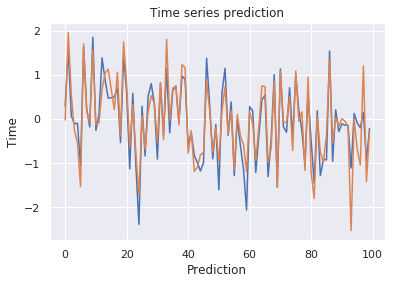

In [51]:
fig, ax = plt.subplots()
ax.plot(pred_output[-100:, :])
ax.plot(np.squeeze(y[:, -100:, :]))
ax.set_title('Time series prediction')
ax.set_xlabel('Prediction')
ax.set_ylabel('Time');

In [57]:
max_memory = 20
score_vec = np.zeros((max_memory, ))

for i_mem in range(max_memory):
    print('Current memory delay: ' + str(i_mem))
    input_data, y = data_utils.memory(sequence_length=4000, memory_delay=i_mem+1)
    b = Reservoir(n_res=1000, res_encoding=None, 
                  input_scale=1, input_encoding=None, 
                  random_projection='simulation', weights_type='gaussian', 
                  activation_fun='tanh', 
                  train_method='ridge', train_param=1e1, 
                  verbose=0)
    b.fit(input_data, y);
    input_data, y = data_utils.memory(sequence_length=1000, memory_delay=i_mem+1)
    pred_output, valid_score = b.score(input_data, y);
    score_vec[i_mem] = valid_score

Current memory delay: 0
Current memory delay: 1
Current memory delay: 2
Current memory delay: 3
Current memory delay: 4
Current memory delay: 5
Current memory delay: 6
Current memory delay: 7
Current memory delay: 8
Current memory delay: 9
Current memory delay: 10
Current memory delay: 11
Current memory delay: 12
Current memory delay: 13
Current memory delay: 14
Current memory delay: 15
Current memory delay: 16
Current memory delay: 17
Current memory delay: 18
Current memory delay: 19


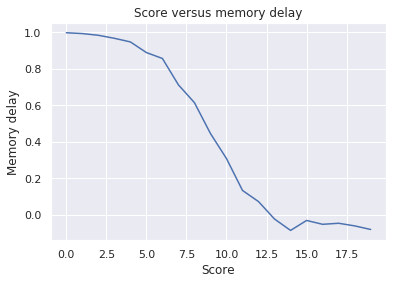

In [58]:
fig, ax = plt.subplots()
ax.plot(score_vec)
ax.set_title('Score versus memory delay')
ax.set_xlabel('Score')
ax.set_ylabel('Memory delay');